In [ ]:
!pip install vk_api

In [2]:
import vk_api

In [ ]:
 # Функция для обработки двухфакторной аутентификации
 # возвращает строку с кодом и булево значение, означающее, нужно ли запомнить устройство для прохождения аутентификации
def auth_handler():
    key = input("Enter authentication code: ")
    remember_device = True # True - сохранить, False - не сохранять.
    return key, remember_device

def stop_f(items):
  print (items)

def main():
  login, password = '<ВАШ ЛОГИН>', '<ВАШ ПАРОЛЬ>'
  vk_session = vk_api.VkApi(
      login, password, 
      auth_handler=auth_handler
     )
  try:
    vk_session.auth()
  except vk_api.AuthError as error_msg:
    print(error_msg)
  tools = vk_api.VkTools(vk_session)
  vk_app = vk_session.get_api() 
  print(vk_app.wall.post(message='Hello world!'))
if __name__ == '__main__':
  main()

{'post_id': 194}


In [36]:
import json
group_id = -58280131

def main():
  login, password = '<ВАШ ЛОГИН>', '<ВАШ ПАРОЛЬ>'
  vk_session = vk_api.VkApi(login, password)
  try:
    vk_session.auth(token_only=True)
  except vk_api.AuthError as error_msg:
    print(error_msg)
    return
  tools = vk_api.VkTools(vk_session) 
  offset = 10
  search_end_date = 1637884800 # 26.11.2021
  c = 20
  wall = tools.get_all('wall.get', c, {'owner_id': group_id})
  while wall['items'][-1]["date"] >= search_end_date:
    c += offset
    wall = tools.get_all('wall.get', c, {'owner_id': group_id})
  print('Posts count:', wall['count'])
 
  f = open("wall.json", 'a')
  f.write(json.dumps(wall, indent=2, ensure_ascii=False))
  f.close()
if __name__ == '__main__':
  main()

Posts count: 284


In [37]:
f = open("wall.json", 'r')
data = json.load(f)
f.close()

In [39]:
#data['items'][0]["likes"]['count']
max_likes = 0
max_post = None
min_likes = 10000000
min_post = None
for post in data['items']:
  if post["likes"]['count'] > max_likes:
    max_post = post
    max_likes = post["likes"]['count']
  if post["likes"]['count'] < min_likes:
    min_post = post
    min_likes = post["likes"]['count']

print("Запись с максимальным количеством лайков: ", max_likes)
print(max_post)
print("Запись с минимальным количеством лайков: ", min_likes)
print(min_post)

Запись с максимальным количеством лайков:  57
{'id': 566, 'from_id': -58280131, 'owner_id': -58280131, 'date': 1637607941, 'marked_as_ads': 0, 'is_favorite': False, 'post_type': 'post', 'text': '🌟Вжух и Мастер Спорта\n\n👏👏👏Поздравляем очаровательную [id163460984|Настю Данилову] с этим потрясающим для любого спортсмена результатом\n\n💪На прошлых соревнованиях ей не хватило 0,04 секунды, а в эти выходные Настя превзошла всех: выполнила Мастера Спорта и забрала заслуженное первое место\n\nЖелаем еще больше тренироваться и не останавливаться на достигнутом, ведь самое главное - бросать постоянно вызов самому себе\n\n#itmo #kronbars #kb_swimming', 'attachments': [{'type': 'photo', 'photo': {'album_id': -7, 'date': 1637607941, 'id': 457239204, 'owner_id': -58280131, 'access_key': 'c9719851c2a076d784', 'post_id': 566, 'sizes': [{'height': 130, 'type': 'm', 'width': 89, 'url': 'https://sun9-41.userapi.com/impg/nU8WptnQQh5RfTaikKRPadgwXao8-fiF9GsKrQ/jHbJfvsidpc.jpg?size=89x130&quality=96&sign=5

In [7]:
# Полный код 

import time
import json
import pickle
user = 211241579
def auth_handler():

# Код двухфакторной аутентификации
  key = input("Enter authentication code: ")
# Если: True ‐ сохранить, False ‐ не сохранять.
  remember_device = True
  return key, remember_device

def get_groups_users(friends_list, tools):
  friends_out = {}
  for friend in friends_list:
    try:
      friends_out[friend] = tools.get_all('friends.get', 50, {'user_id': friend})
    except Exception:
      friends_out[friend] = []
    time.sleep(1)
  return friends_out


login, password = '89155005807', 'Zaq11121011469drPaul158'
vk_session = vk_api.VkApi(
  login, password,
  auth_handler=auth_handler 
  )
try:
  vk_session.auth()
except vk_api.AuthError as error_msg:
  print(error_msg)
tools = vk_api.VkTools(vk_session)
friend_list=[]
friend_list.append(user)
friends_out = get_groups_users(friend_list, tools)
print(friends_out)


{211241579: {'count': 81, 'items': [6092060, 7439221, 29160765, 45864418, 46243556, 54951405, 79250729, 88401057, 88623560, 89205956, 92630274, 94745029, 96390038, 100097684, 100453498, 100581625, 107218639, 109141606, 134573346, 138600844, 138739542, 139281297, 139703992, 140487113, 144135398, 146110318, 146780396, 147377916, 148404132, 151246738, 151367092, 153004342, 156563620, 165820469, 165969243, 166534168, 171228462, 174197251, 176437463, 183446903, 188671958, 190450835, 191228837, 195021757, 196103591, 196757266, 197830497, 201678053, 206183739, 214633483, 215158069, 224160504, 226699496, 253645833, 255657708, 272410208, 278980107, 284773635, 289766617, 294649163, 295679569, 298452034, 302984931, 309623178, 315674234, 321976872, 328487494, 367226654, 380321773, 414060435, 423696520, 430404012, 433272666, 435074467, 449012211, 456166526, 470629498, 560037656, 583547767, 585049964, 650007750]}}


In [ ]:
!pip install pip --upgrade

In [ ]:
!pip install networkx

In [ ]:
#!pip install --upgrade --force-reinstall matplotlib
#!pip install --upgrade --force-reinstall networkx

In [5]:
import networkx as nx

# Функция создает создает граф, вершинами которого являются
# узлы, содержащие id друзей, ребра связывают пользователя с его друзьями
def make_graph1(friends_out, friends_friends):
  graph = nx.Graph()
  graph.add_node(user, size = friends_out[user]['count'])
  for i in friends_out[user]['items']:
    #try:
    print(i)
    graph.add_node(i, size = friends_friends[i]['count'])
    intersection = set(friends_out[user]['items']).intersection(set(friends_friends[i]['items']))
    graph.add_edge(user, i, weight=len(intersection))
    #except Exception:
      #print("err")
  return graph


In [8]:
friend_friends = get_groups_users(friends_out[user]['items'], tools)
to_del = []
for id in friend_friends.keys():
  if len(friend_friends[id]) == 0:
    print(id)
    #friend_friends.pop(id, None)
    to_del.append(id)

for id in to_del:
  friend_friends.pop(id, None)
  friends_out[user]["items"].remove(id)

#with open('friends_friends.pkl', 'wb+') as output:
#  pickle.dump(friend_friends, output, pickle.HIGHEST_PROTOCOL)

6092060
7439221
29160765
100453498
100581625
146110318
151246738
153004342
165820469
165969243
176437463
197830497
201678053
272410208
367226654
423696520
430404012
449012211
470629498


In [9]:
with open('friends_friends.pkl', 'wb+') as output:
  pickle.dump(friend_friends, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
#6092060 in 
#friends_out[user]["items"]
#6092060 in friend_friends

In [10]:
friend_friends.keys()

dict_keys([45864418, 46243556, 54951405, 79250729, 88401057, 88623560, 89205956, 92630274, 94745029, 96390038, 100097684, 107218639, 109141606, 134573346, 138600844, 138739542, 139281297, 139703992, 140487113, 144135398, 146780396, 147377916, 148404132, 151367092, 156563620, 166534168, 171228462, 174197251, 183446903, 188671958, 190450835, 191228837, 195021757, 196103591, 196757266, 206183739, 214633483, 215158069, 224160504, 226699496, 253645833, 255657708, 278980107, 284773635, 289766617, 294649163, 295679569, 298452034, 302984931, 309623178, 315674234, 321976872, 328487494, 380321773, 414060435, 433272666, 435074467, 456166526, 560037656, 583547767, 585049964, 650007750])

In [11]:
import networkx as nx

def make_graph(friends_out, friends_friends):
  graph = nx.Graph()
  graph.add_node(user, size = friends_out[user]['count'])
  for i in friends_out[user]['items']:
    try:
      graph.add_node(i, size = friends_friends[i]['count'])
      intersection = set(friends_out[user]['items']).intersection(set(friends_friends[i]['items']))
      graph.add_edge(user, i, weight=len(intersection))
    except Exception:
      print("err")
  for i in range(len(friends_out[user]['items'])):
    id1= friends_out[user]['items'][i]
    for k in range(i+1, len(friends_out[user]['items'])):
      id2= friends_out[user]['items'][k]
      try:
        intersection = set(friends_friends[id1]['items']).intersection(set(friends_friends[id2]['items']))
        if len(intersection) > 0:
          graph.add_edge(id1, id2, weight=len(intersection))
      except Exception:
        print("err friend")
  return graph

with open("friends_friends.pkl", "rb") as input:
  friend_friends = pickle.load(input)
g = make_graph1(friends_out, friend_friends)



45864418
46243556
54951405
79250729
88401057
88623560
89205956
92630274
94745029
96390038
100097684
107218639
109141606
134573346
138600844
138739542
139281297
139703992
140487113
144135398
146780396
147377916
148404132
151367092
156563620
166534168
171228462
174197251
183446903
188671958
190450835
191228837
195021757
196103591
196757266
206183739
214633483
215158069
224160504
226699496
253645833
255657708
278980107
284773635
289766617
294649163
295679569
298452034
302984931
309623178
315674234
321976872
328487494
380321773
414060435
433272666
435074467
456166526
560037656
583547767
585049964
650007750


In [34]:
import numpy
import matplotlib

def plot_graph(graph, adjust_nodesize):
  pos=nx.spring_layout(graph, k=0.1)
  nodesize = [graph.nodes[i]['size']/adjust_nodesize for i in graph.nodes()]

  edge_mean = numpy.mean([graph[i[0]][i[1]]['weight'] for i in graph.edges()])
  edge_std_dev = numpy.std([graph[i[0]][i[1]]['weight'] for i in graph.edges()])
  edgewidth = [((graph[i[0]][i[1]]['weight'] - edge_mean)/edge_std_dev/2) for i in graph.edges()]

  nx.draw_networkx_nodes(graph, pos,node_size=nodesize, node_color='y', alpha=0.9)
  nx.draw_networkx_labels(graph,pos)
  nx.draw_networkx_edges(graph,pos,width=edgewidth,edge_color='b')

  import matplotlib.pyplot as plt
  plt.figure(figsize=(12,8))
  plt.savefig('saved.png')
  plt.show()

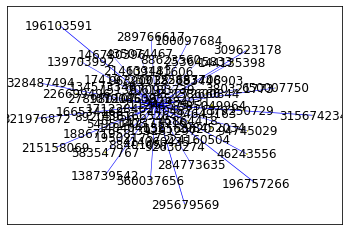

<Figure size 864x576 with 0 Axes>

In [35]:
plot_graph(g, 500)